In [20]:
import pandas as pd
import numpy as np

from scipy.stats import boxcox, probplot
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

In [5]:
data  = pd.read_csv('../data/calls_data.csv')
data.head()

,address,duration_minutes,feat_1,feat_2,geometry,poly_side,atm,bank,bus_station,bus_stop,cafe,device_charging_station,office,public_service,restaurant,shelter,station,traffic_signals,waste_basket
0,8811aa602dfffff,5.092667,0.0,25.0,"POLYGON ((37.75103240708841 55.80603592669851,...",poly3,1.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,8811aa45d9fffff,6.037037,0.0,63.0,"POLYGON ((37.40263832553934 55.71842073952227,...",poly0,5.0,3.0,0.0,5.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2,881181a235fffff,4.722727,0.0,11.0,"POLYGON ((37.74271427608124 55.43691297888912,...",poly1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8811aa722bfffff,5.868982,0.0,36.0,"POLYGON ((37.42241082476207 55.85767681439805,...",poly2,2.0,2.0,0.0,12.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8811aa714dfffff,2.937719,0.0,19.0,"POLYGON ((37.45469517717559 55.7843306893976, ...",poly2,1.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

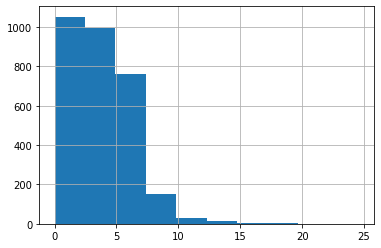

In [6]:
data['duration_minutes'].hist()

In [7]:
data = data.loc[data['duration_minutes'] != 0]
X = data.drop(['address', 'geometry', 'poly_side', 'duration_minutes'], axis=1)
y = data['duration_minutes']

((array([-3.5025565 , -3.25887541, -3.1241227 , ...,  3.1241227 ,
          3.25887541,  3.5025565 ]),
  array([5.08305958e-04, 9.15010572e-04, 2.12894199e-03, ...,
         1.72166666e+01, 1.90000000e+01, 2.45833330e+01])),
 (2.5386054994218377, 3.6894608374072875, 0.9694042326531063))

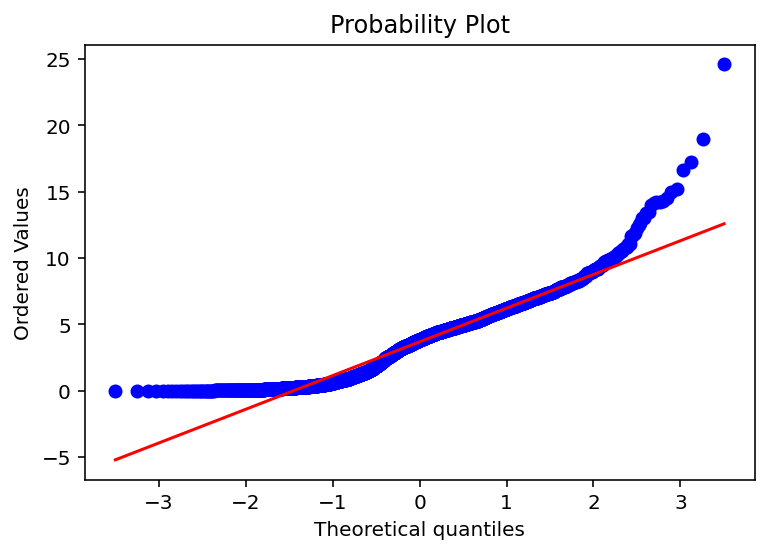

In [10]:
f, ax = plt.subplots()
probplot(y, plot=ax)

<AxesSubplot:>

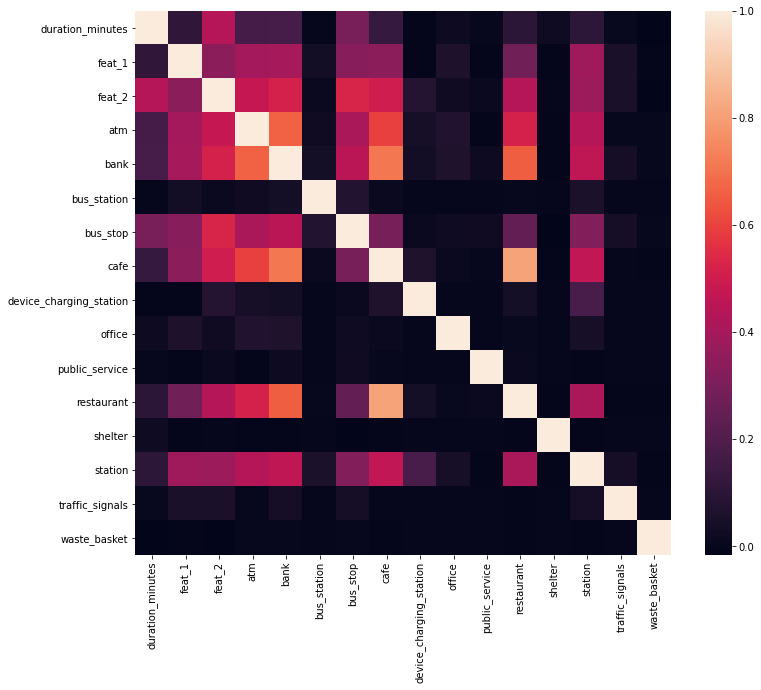

In [21]:
plt, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(data.drop(['address', 'geometry', 'poly_side'], axis=1).corr(), ax=ax)